In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
df_1 = pd.get_dummies(df, columns=["Undergrad", 'Marital.Status', 'Urban'], drop_first=True)
df_1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [7]:
df_1.shape

(600, 7)

In [8]:
df_1["Fraud"] = np.where(df_1['Taxable.Income']<=30000, 0, 1)
df_1 = df_1.drop(columns=["Taxable.Income"], axis = 1)
df_1.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Fraud
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1


In [9]:
x = df_1.iloc[:,1:6]
y = df_1.iloc[:,6]

In [10]:
y.sum()

476

In [11]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [12]:
x_train.shape, x_test.shape ,y_train.shape ,y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=9)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [14]:
df_1.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES',
       'Fraud'],
      dtype='object')

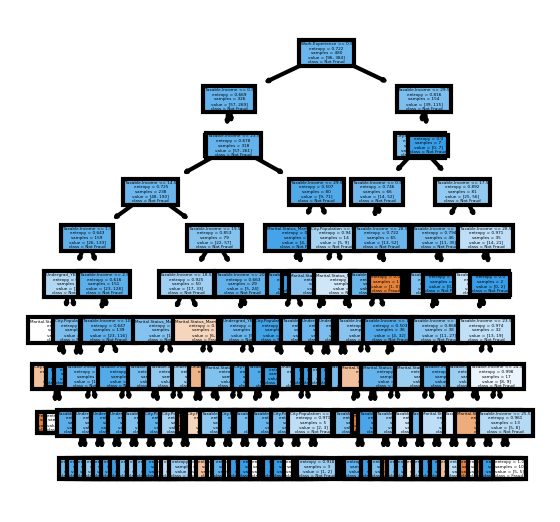

In [15]:
fn=['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']
cn=['Fraud', 'Not Fraud']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [16]:
preds = model.predict(x_test) # predicting on test data set 
preds

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.11      0.07      0.09        28
           1       0.74      0.82      0.78        92

    accuracy                           0.64       120
   macro avg       0.42      0.44      0.43       120
weighted avg       0.59      0.64      0.62       120



In [18]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y, cv=5)
results

array([0.64166667, 0.64166667, 0.71666667, 0.64166667, 0.7       ])

In [19]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.11      0.07      0.09        28
           1       0.74      0.82      0.78        92

    accuracy                           0.64       120
   macro avg       0.42      0.44      0.43       120
weighted avg       0.59      0.64      0.62       120



In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

params_grid ={"max_depth" : [5,7,9,10,12,14],
               "min_samples_leaf" : range(2,10),
               "min_samples_split" : [4,8,10,12,15,18,20],
               "max_leaf_nodes" : range(4,21) }

dt_estimator = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_distributions=params_grid, cv=10, random_state=0, n_jobs=-1)

dt_estimator.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 10, 12, 14],
                                        'max_leaf_nodes': range(4, 21),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': [4, 8, 10, 12, 15,
                                                              18, 20]},
                   random_state=0)

In [21]:
dt_estimator.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_leaf_nodes': 5,
 'max_depth': 14}

In [22]:
y_pred_t = dt_estimator.predict(x_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
print('dt_Train_RMSE:', rmse_t)
print('dt_Train_R2:', metrics.r2_score( y_train, y_pred_t ))

y_pred_test = dt_estimator.predict( x_test )
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred_test ) )
print('dt_Test_RMSE: ',rmse)
print('dt_Test_R2: ',metrics.r2_score( y_test, y_pred_test ))

dt_Train_RMSE: 0.4472135954999579
dt_Train_R2: -0.24999999999999978
dt_Test_RMSE:  0.48304589153964794
dt_Test_R2:  -0.3043478260869563
